In [26]:
import pandas as pd


X = pd.read_csv('/content/drive/MyDrive/Gamma_telescope/magic04.data',sep=',',header=None)
dataset = pd.DataFrame(X)
dataset.columns = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']



Y = dataset['class']
X = dataset.drop(['class'],axis=1)

from sklearn.utils import shuffle
X,Y = shuffle(X,Y)


In [27]:
from sklearn.preprocessing import MinMaxScaler 
X = MinMaxScaler().fit_transform(X)

from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
Y = label_encoder.fit_transform(Y)
  
print(Y)

print(X.shape)
print(Y.shape)

[1 0 0 ... 1 0 1]
(19020, 10)
(19020,)


In [28]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


model = tf.keras.Sequential([
    layers.Dense(2526,activation='relu',input_shape=(10,),kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
  
    layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),


    layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    
    
    

   
    layers.Dense(1)
])

from keras.optimizers import SGD
opt = SGD(lr=0.001,momentum=0.9,nesterov=True)

model.compile(optimizer=opt,loss = keras.losses.BinaryCrossentropy(from_logits=True),metrics='accuracy')

callback = tf.keras.callbacks.EarlyStopping(patience=15,restore_best_weights=True,monitor='val_accuracy')

model.summary()

history = model.fit(X,Y,batch_size=8, epochs = 100,shuffle=True,callbacks = [callback],validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 2526)              27786     
_________________________________________________________________
dropout_14 (Dropout)         (None, 2526)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               646912    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                

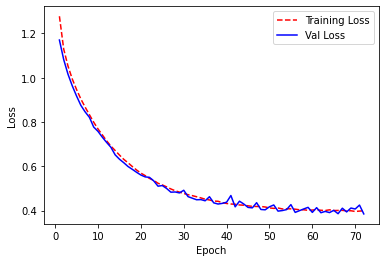

In [29]:
import matplotlib.pyplot as plt

training_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

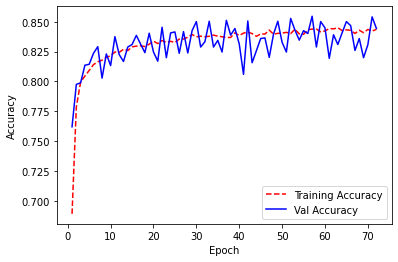

In [30]:
import matplotlib.pyplot as plt

training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_acc) + 1)

# Visualize loss history
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['Training Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [31]:
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

595/595 [==============================] - 2s 3ms/step - loss: 0.3964 - accuracy: 0.8596
Accuracy: 85.96
